# Powering Tetouan: Time Series Forecasting on Power Consumption in Quads, Smir and Boussafou zones.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import xgboost as xgb

In [133]:
df = pd.read_csv('sample_data.csv')

In [134]:
df.head()

,Datetime,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2/12/2017 14:40,30000,10000,20000
1,11/22/2017 15:30,30000,10000,20000
2,10/15/2017 1:50,30000,10000,20000
3,9/11/2017 23:00,30000,10000,20000
4,12/26/2017 1:20,30000,10000,20000


In [135]:
train = pd.read_csv('train_data.csv')

In [136]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,5/5/2017 22:30,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,5/5/2017 21:30,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,4/11/2017 16:40,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,9/30/2017 21:40,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,1/5/2017 10:40,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [137]:
from datetime import datetime

train['Datetime'] = train['Datetime'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))



In [138]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [139]:

train.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
41927,2017-02-27 02:40:00,14.89,56.81,0.081,0.051,0.111,22600.67797,13542.85714,14408.68342
41928,2017-04-18 10:50:00,19.48,49.29,0.086,732.000,59.810,34770.80732,20492.87169,17815.27273
41929,2017-08-18 17:30:00,27.57,54.98,0.067,317.800,76.000,37615.80466,25519.32418,26892.03762
41930,2017-04-27 00:40:00,14.21,71.80,0.082,0.026,0.167,26722.92788,15085.53971,17396.36364
41931,2017-02-22 05:30:00,13.48,67.66,0.083,0.059,0.178,25425.76271,12729.48328,14130.81407


In [140]:

train = train.set_index('Datetime')

In [141]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [142]:
train = train.sort_index()

In [143]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048


In [145]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [92]:
train.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000
mean,18.794223,68.322970,1.958469,181.852878,75.093093,32320.339175,21026.447763,17818.976229
std,5.816396,15.550517,2.348605,263.567443,124.152443,7132.268087,5198.438443,6615.433440
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.380000,58.367500,0.078000,0.062000,0.122000,26275.404260,16964.133740,13104.578310
50%,18.770000,69.940000,0.086000,4.895500,4.318000,32234.913770,20802.910600,16409.233910
75%,22.860000,81.500000,4.915000,317.200000,101.300000,37274.569030,24683.207865,21580.023753
max,39.780000,94.800000,6.483000,1163.000000,933.000000,52204.395120,37408.860760,47598.326360


In [93]:
train.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:50:00', '2017-01-01 01:00:00',
               '2017-01-01 01:10:00', '2017-01-01 01:40:00',
               '2017-01-01 01:50:00', '2017-01-01 02:00:00',
               ...
               '2017-12-30 22:10:00', '2017-12-30 22:20:00',
               '2017-12-30 22:30:00', '2017-12-30 22:40:00',
               '2017-12-30 22:50:00', '2017-12-30 23:00:00',
               '2017-12-30 23:10:00', '2017-12-30 23:20:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='Datetime', length=41932, freq=None)

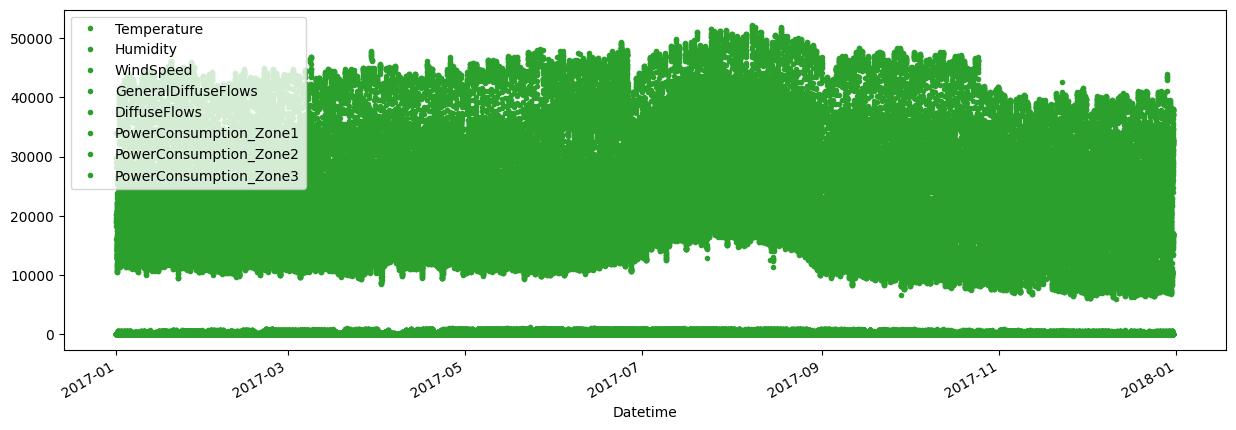

In [94]:
color_pal = sns.color_palette()
train.plot(style='.', figsize=(15, 5),
           color=color_pal[2],
           )
plt.show()

In [95]:
train.duplicated().sum()

0

In [96]:
train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [97]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

<Axes: xlabel='Datetime'>

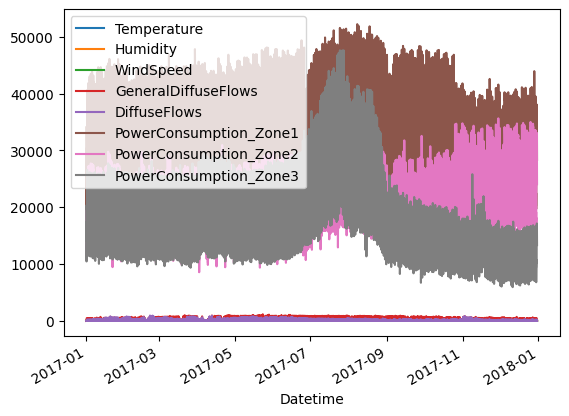

In [98]:
train.plot()

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [101]:
adf_test(train['PowerConsumption_Zone1'])

ADF Statistics: -31.241383612466777
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [102]:
adf_test(train['PowerConsumption_Zone2'])

ADF Statistics: -24.403802757819943
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [103]:
adf_test(train['PowerConsumption_Zone3'])

ADF Statistics: -14.22576882822962
p- value: 1.6283818887319287e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Datetime'>

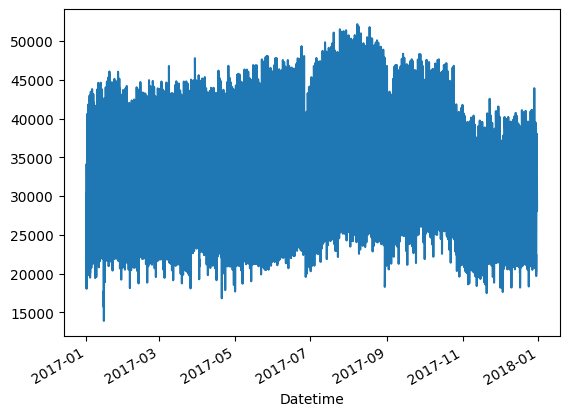

In [104]:
train['PowerConsumption_Zone1'].plot()

<Axes: xlabel='Datetime'>

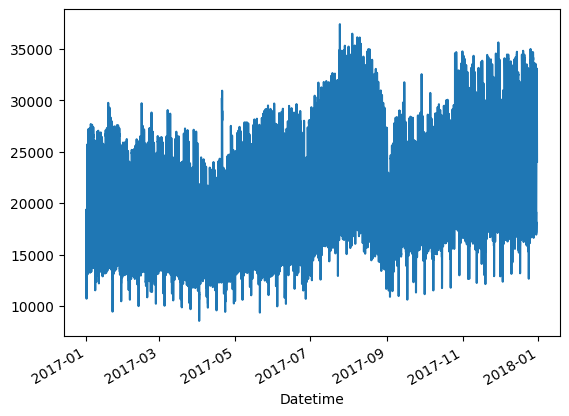

In [105]:
train['PowerConsumption_Zone2'].plot()

<Axes: xlabel='Datetime'>

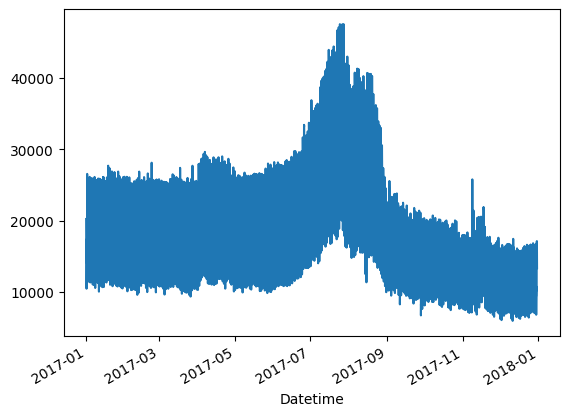

In [106]:
train['PowerConsumption_Zone3'].plot()

## Outliers Analysis and removal


<Axes: ylabel='Frequency'>

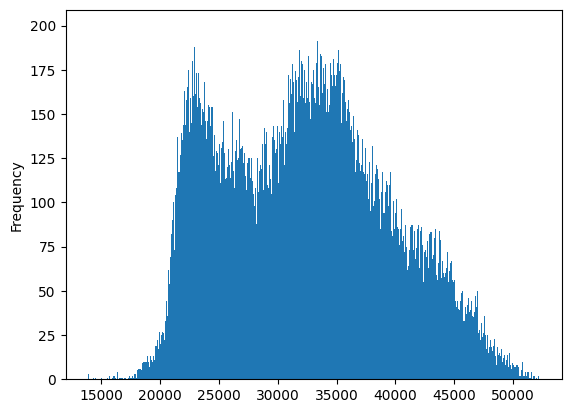

In [107]:
train['PowerConsumption_Zone1'].plot(kind='hist', bins=500)

<Axes: xlabel='Datetime'>

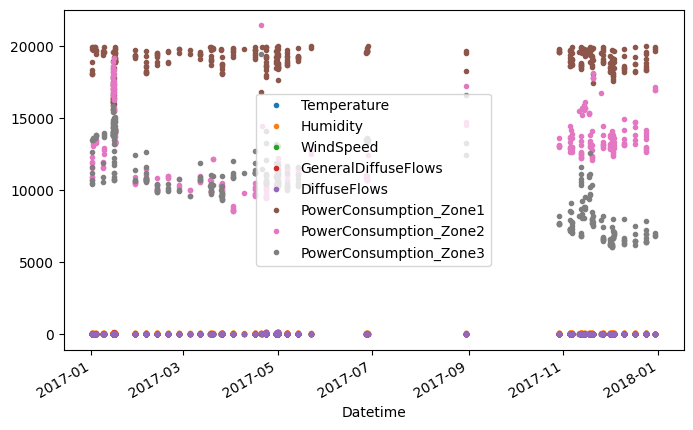

In [108]:
train.query('PowerConsumption_Zone1 < 20_000').plot(figsize=(8, 5), style = '.')

<Axes: xlabel='Datetime'>

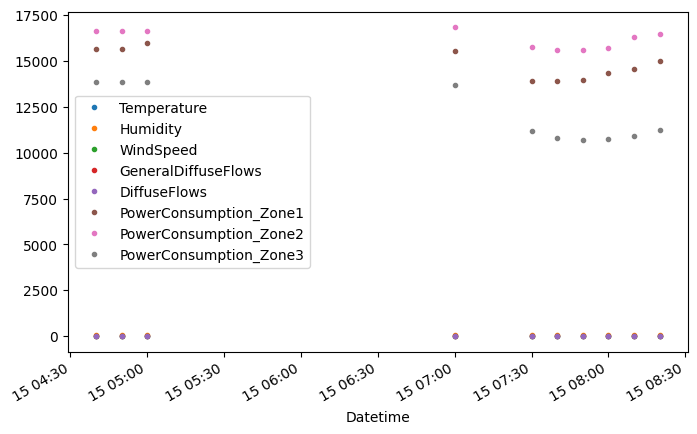

In [109]:
train.query('PowerConsumption_Zone1 < 16_000').plot(figsize=(8, 5), style = '.')



In [110]:
train = train.query('PowerConsumption_Zone1 > 19_000').copy()

<Axes: ylabel='Frequency'>

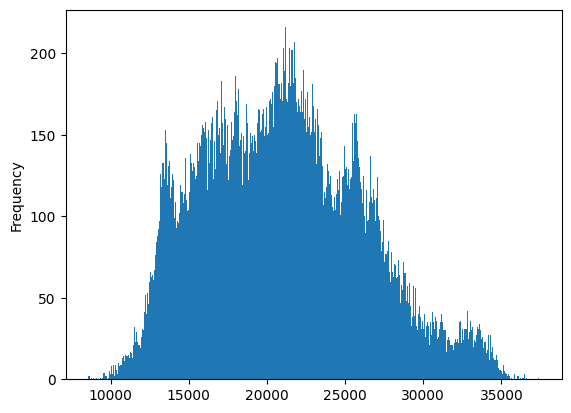

In [111]:
train['PowerConsumption_Zone2'].plot(kind='hist', bins=500)

<Axes: xlabel='Datetime'>

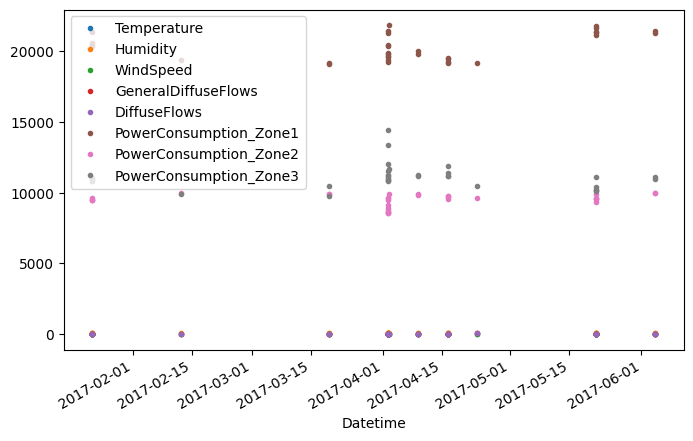

In [112]:
train.query('PowerConsumption_Zone2 < 10_000').plot(figsize=(8, 5), style = '.')

<Axes: xlabel='Datetime'>

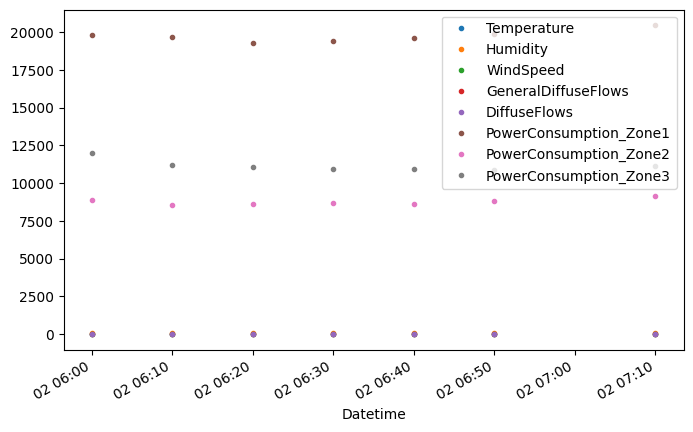

In [113]:
train.query('PowerConsumption_Zone2 < 9_300').plot(figsize=(8, 5), style = '.')

In [114]:
train = train.query('PowerConsumption_Zone2 > 9_300').copy()

<Axes: ylabel='Frequency'>

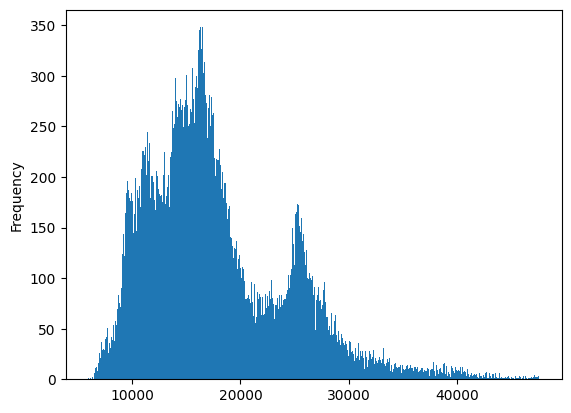

In [115]:
train['PowerConsumption_Zone3'].plot(kind='hist', bins=500)

<Axes: xlabel='Datetime'>

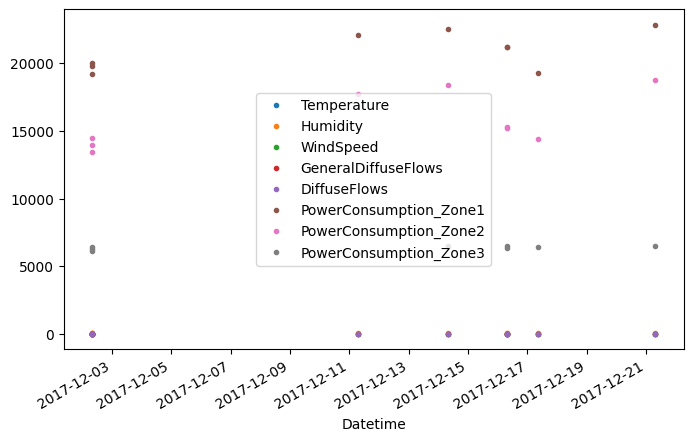

In [116]:
train.query('PowerConsumption_Zone3 < 6_500').plot(figsize=(8, 5), style = '.')


In [117]:
train = train.query('PowerConsumption_Zone3 > 6_500').copy()

In [118]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

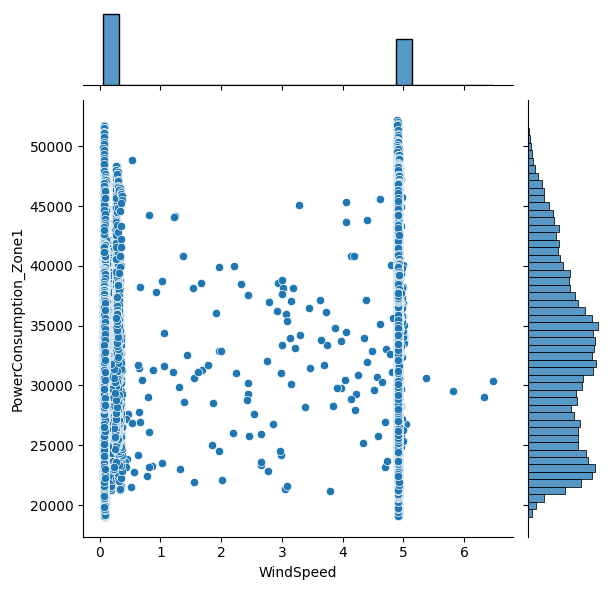

In [119]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone1', data=train)

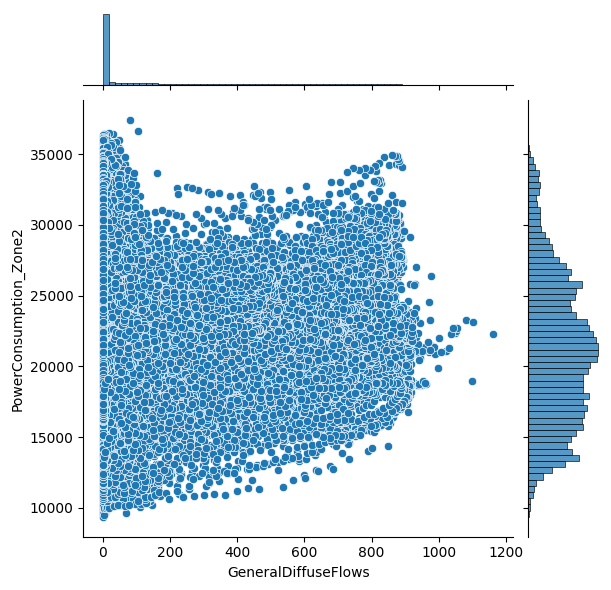

In [120]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone2', data=train)

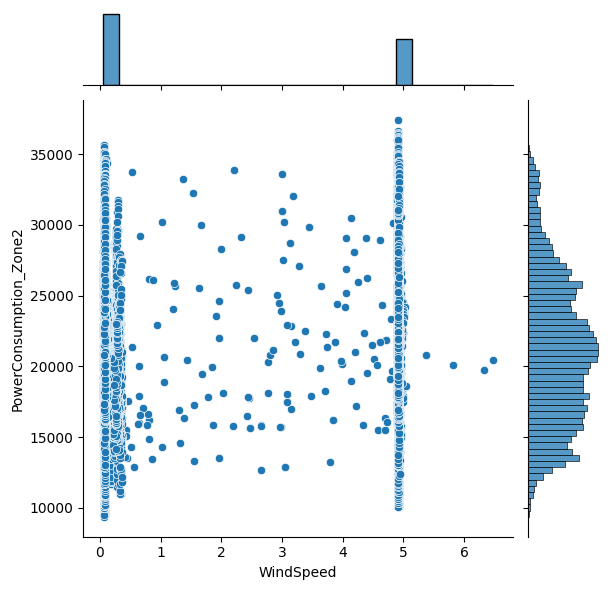

In [121]:


sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone2', data=train)

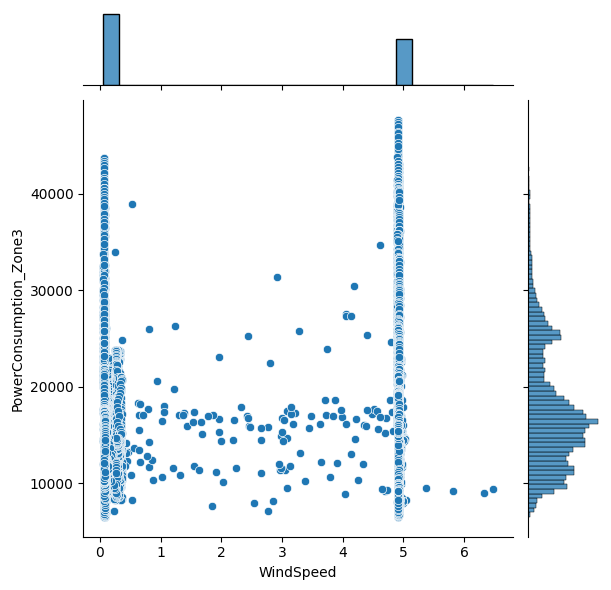

In [122]:


sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone3', data=train)

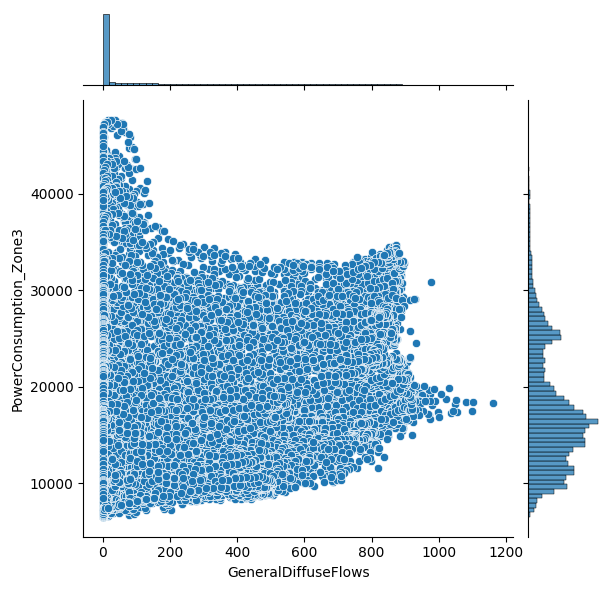

In [123]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone3', data=train)

In [124]:
uv = np.percentile(train.WindSpeed,[99])[0]

In [125]:
train[(train.WindSpeed>uv)]

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 10:20:00,5.996,69.85,4.930,282.70,31.960,26393.92405,16059.57447,14671.807230
2017-05-09 14:10:00,21.420,71.00,4.931,827.00,132.600,35705.70492,23342.41486,15997.408910
2017-05-09 14:20:00,21.510,70.40,4.930,808.00,122.100,35819.01639,23297.83282,16417.165990
2017-05-11 13:40:00,21.850,69.90,4.930,867.00,218.500,36423.34426,23030.34056,17845.506070
2017-05-15 15:10:00,21.140,67.60,4.931,795.00,435.900,34119.34426,23134.36533,17507.368420
...,...,...,...,...,...,...,...,...
2017-11-19 08:30:00,9.770,85.70,4.934,62.93,33.360,20972.30769,14016.94215,8454.939759
2017-11-19 08:40:00,9.940,85.40,4.933,94.40,39.400,21323.07692,14485.53719,8611.084337
2017-11-19 09:00:00,9.930,84.40,4.932,107.30,33.820,22633.84615,15162.39669,9039.036145


In [126]:
train.WindSpeed[(train.WindSpeed> 3*uv)] = 3*uv

In [127]:
from statsmodels.tsa.stattools import adfuller

for feature in train.columns:
    result = adfuller(train[feature])
    print(f'ADF test for {feature}:')
    print('Test statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
    if result[1] > 0.05:
        print(f'The p-value of the ADF test for {feature} is greater than 0.05, so the series is likely a random walk.')
    else:
        print(f'The p-value of the ADF test for {feature} is less than or equal to 0.05, so the series is likely not a random walk.')
    print()


ADF test for Temperature:
Test statistic: -7.597
p-value: 0.000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The p-value of the ADF test for Temperature is less than or equal to 0.05, so the series is likely not a random walk.

ADF test for Humidity:
Test statistic: -14.519
p-value: 0.000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The p-value of the ADF test for Humidity is less than or equal to 0.05, so the series is likely not a random walk.

ADF test for WindSpeed:
Test statistic: -6.747
p-value: 0.000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The p-value of the ADF test for WindSpeed is less than or equal to 0.05, so the series is likely not a random walk.

ADF test for GeneralDiffuseFlows:
Test statistic: -36.796
p-value: 0.000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The p-value of the ADF test for GeneralDiffuseFlows is less than or equal to 0.05, so the series is likely not a random walk.

ADF test for DiffuseFlows:
Test statistic: -

In [128]:
train

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152


In [129]:
train['Datetime'] = train.index 
train.reset_index(drop=True, inplace=True)

In [130]:



file_path = '/Users/SalmaDkier/Documents/Codings/KAGGLE Competition/FinalTrain.csv'

# save the DataFrame to a CSV file at the specified location
train.to_csv(file_path, index=False )


In [131]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Datetime
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01 00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01 00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01 00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01 00:30:00
4,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,2017-01-01 00:50:00
